In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('dataset/telescope_data.csv',index_col=0)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
cols = data.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OrdinalEncoder
myimpute = OrdinalEncoder(handle_unknown='error')
data['class'] = myimpute.fit_transform(data[['class']])

In [6]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0.0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0.0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0.0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0.0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0.0


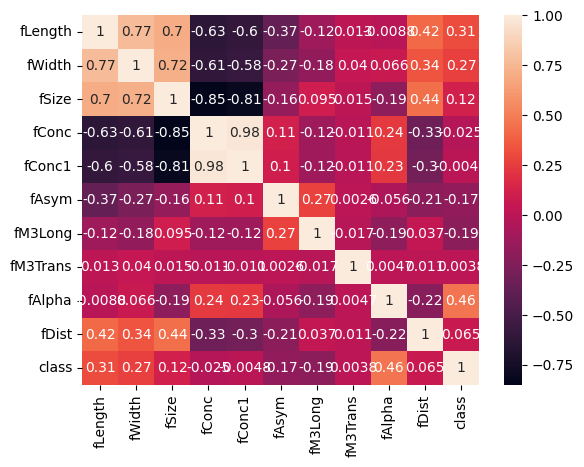

In [7]:
import seaborn as sns
corr = data.corr()
sns.heatmap(data=corr,annot=True)
plt.show()

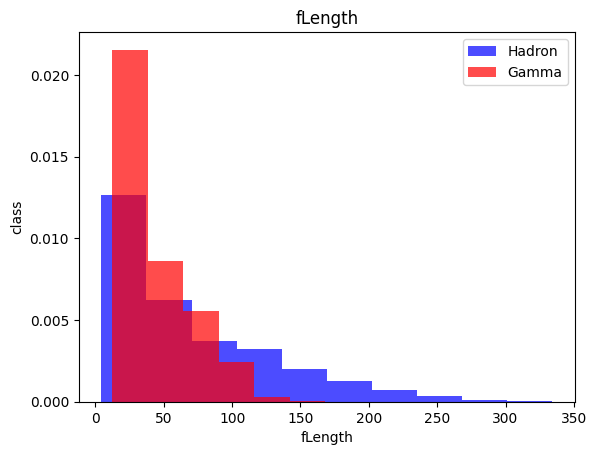

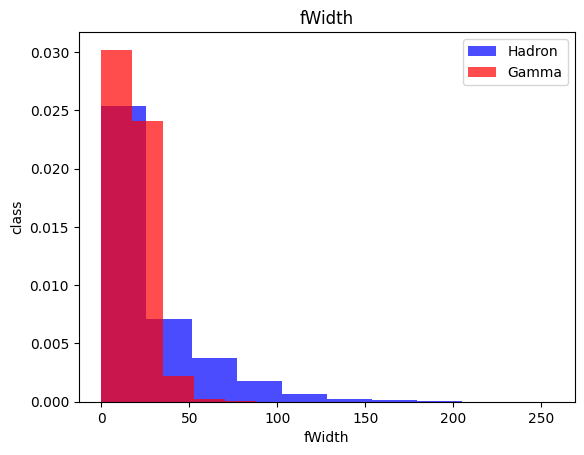

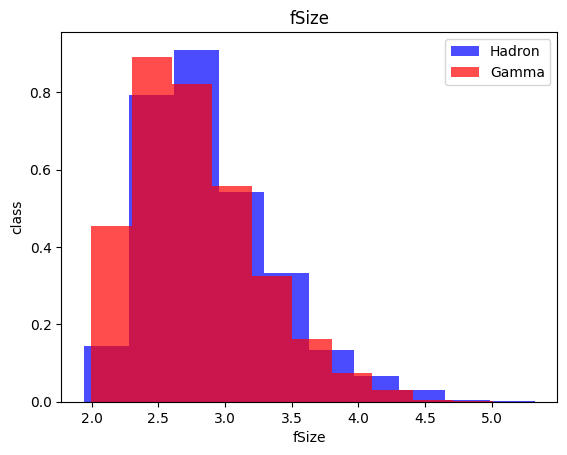

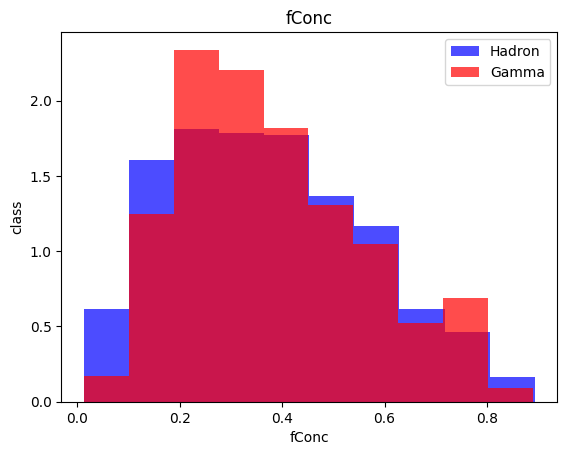

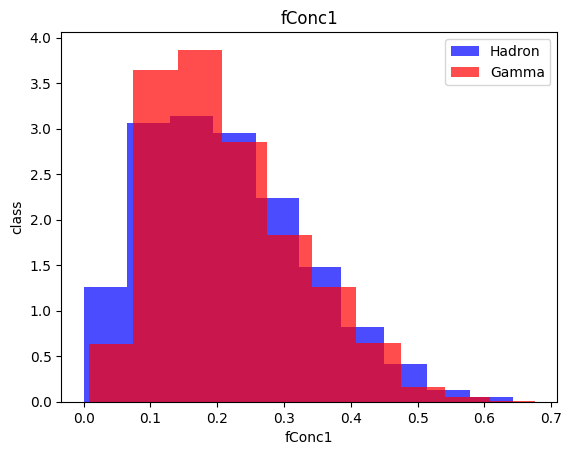

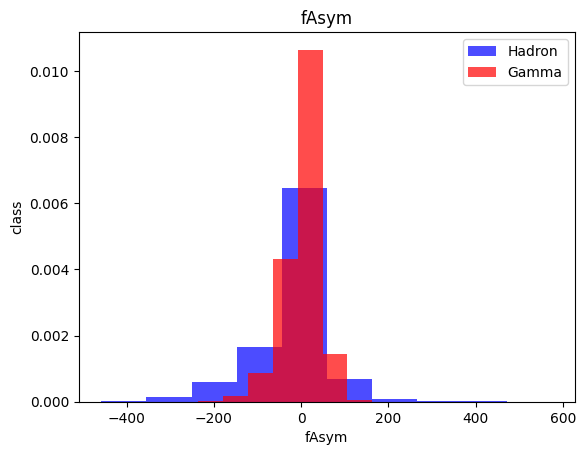

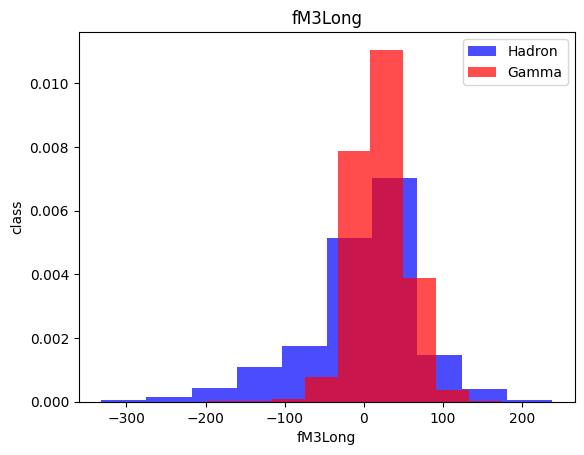

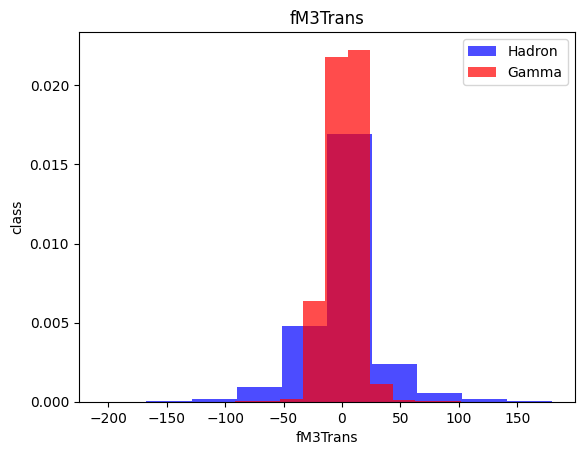

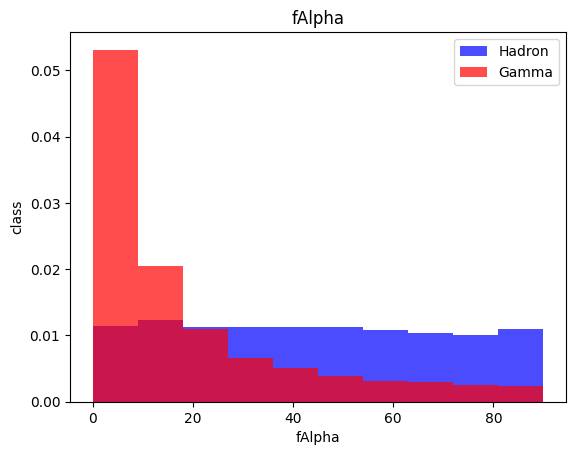

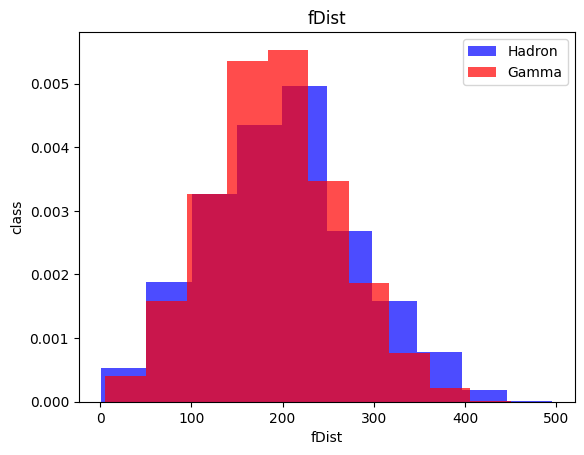

In [8]:
for col in cols:
    plt.hist(data[data['class']==1][col],color='blue',density=True,label='Hadron',alpha=0.7)
    plt.hist(data[data['class']==0][col],color='red',density=True,label='Gamma',alpha=0.7)
    # plt.hist(data=data,x=col,bins=10)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('class')
    plt.legend()
    plt.show()

In [9]:
train,valid,test = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

c:\Users\7XIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [11]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]]
    y = dataframe[dataframe.columns[-1]]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y

In [12]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

4022
7390


In [13]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0.0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0.0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0.0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0.0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0.0


In [14]:
train,X_train,y_train = scale_dataset(train,oversample=True)

In [15]:
sum(y_train == 0)

7390

In [16]:
sum(y_train == 1)

7390

In [17]:
valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
test,X_test,y_test = scale_dataset(test,oversample=False)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
pred = knn_model.predict(X_valid)
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [20]:
y_valid

17621    1.0
2973     0.0
356      0.0
4745     0.0
18314    1.0
        ... 
12538    1.0
14837    1.0
5825     0.0
4247     0.0
18618    1.0
Name: class, Length: 3804, dtype: float64

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_pred=pred,y_true=y_valid))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2447
         1.0       0.75      0.73      0.74      1357

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [27]:
y_pred = nb_model.predict(X_valid)

In [28]:
print(classification_report(y_pred=y_pred,y_true=y_valid))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      2447
         1.0       0.71      0.40      0.51      1357

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train,y_train)

In [32]:
y_pred = lr_model.predict(X_valid)
print(classification_report(y_pred=y_pred,y_true=y_valid))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2447
         1.0       0.70      0.71      0.71      1357

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [33]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model = sv_model.fit(X_train,y_train)

In [34]:
y_pred = sv_model.predict(X_valid)

In [35]:
print(classification_report(y_pred=y_pred,y_true=y_valid))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2447
         1.0       0.82      0.79      0.81      1357

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



In [39]:
import tensorflow as tf

In [40]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

c:\Users\7XIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accracy'])
#1:53:06